In [153]:
import numpy as np
import pandas as pd
import sklearn

In [154]:
red = pd.read_csv("winequality-red.csv")

In [155]:
red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [156]:
def str_to_df(row):
    return row.split(";")

In [157]:
cols = str_to_df('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"')

In [158]:
cols

['fixed acidity',
 '"volatile acidity"',
 '"citric acid"',
 '"residual sugar"',
 '"chlorides"',
 '"free sulfur dioxide"',
 '"total sulfur dioxide"',
 '"density"',
 '"pH"',
 '"sulphates"',
 '"alcohol"',
 '"quality"']

In [159]:
red_rows = red['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].apply(str_to_df)





In [160]:
data = list(red_rows)

In [161]:
for i in range(len(cols)):
    cols[i] = cols[i].replace('"', '')
    cols[i] = cols[i].replace(' ', '_')

In [162]:
df = pd.DataFrame(data, columns = cols)

In [163]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [164]:
import matplotlib.pyplot as plt

In [165]:
df['quality'] = df['quality'].astype('int64')
df['fixed_acidity'] = df['fixed_acidity'].astype('float')

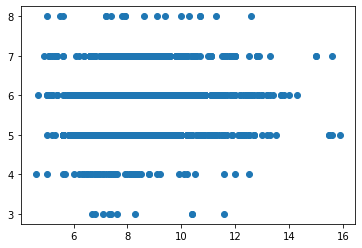

In [166]:
plt.scatter(df['fixed_acidity'], df['quality'])

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = np.array(df['fixed_acidity']).reshape(-1, 1)
y = np.array(df['quality']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression().fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.03189529631357679


In [168]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(regr, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.674 (0.038)


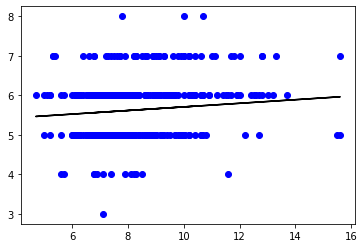

In [169]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [170]:
def convert(col_name):
    df[col_name] = df[col_name].astype('float')
    
for col in cols[:-1]:
    convert(col)

In [171]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [172]:
regr = LinearRegression().fit(X_train, y_train)

In [173]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(regr, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.505 (0.031)


In [174]:
print(regr.score(X_test, y_test))

0.3036354976803991


In [175]:
#4 hyperparamters: Degree of polynomial, type of regularization, regularization term, and learning rate

In [176]:
#Ridge regression:

In [177]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import mean
from numpy import std
from numpy import absolute
# load the dataset

In [185]:
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.505 (0.032)


In [ ]:
#Same model but this time, square all the values

In [186]:
from sklearn.preprocessing import PolynomialFeatures

In [196]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

In [197]:
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_poly, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.498 (0.030)


In [206]:
for j in np.arange(0, 20, 0.25):
    print("Lambda: ")
    print(j)

    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(X)

    # define model
    model = Ridge(alpha=j)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, x_poly, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    print()

Lambda: 
0.0
Mean MAE: 0.505 (0.032)

Lambda: 
0.25
Mean MAE: 0.499 (0.031)

Lambda: 
0.5
Mean MAE: 0.498 (0.030)

Lambda: 
0.75
Mean MAE: 0.498 (0.030)

Lambda: 
1.0
Mean MAE: 0.498 (0.030)

Lambda: 
1.25
Mean MAE: 0.498 (0.030)

Lambda: 
1.5
Mean MAE: 0.497 (0.030)

Lambda: 
1.75
Mean MAE: 0.497 (0.030)

Lambda: 
2.0
Mean MAE: 0.497 (0.030)

Lambda: 
2.25
Mean MAE: 0.497 (0.030)

Lambda: 
2.5
Mean MAE: 0.497 (0.030)

Lambda: 
2.75
Mean MAE: 0.497 (0.030)

Lambda: 
3.0
Mean MAE: 0.497 (0.030)

Lambda: 
3.25
Mean MAE: 0.497 (0.030)

Lambda: 
3.5
Mean MAE: 0.497 (0.030)

Lambda: 
3.75
Mean MAE: 0.497 (0.030)

Lambda: 
4.0
Mean MAE: 0.497 (0.030)

Lambda: 
4.25
Mean MAE: 0.497 (0.030)

Lambda: 
4.5
Mean MAE: 0.497 (0.030)

Lambda: 
4.75
Mean MAE: 0.497 (0.030)

Lambda: 
5.0
Mean MAE: 0.497 (0.030)

Lambda: 
5.25
Mean MAE: 0.497 (0.030)

Lambda: 
5.5
Mean MAE: 0.497 (0.030)

Lambda: 
5.75
Mean MAE: 0.497 (0.030)

Lambda: 
6.0
Mean MAE: 0.497 (0.030)

Lambda: 
6.25
Mean MAE: 0.497 (0.030)
